"OXFORD VGG Face dataset

Please read "http://www.robots.ox.ac.uk/~vgg/data/face_dataset/licence.txt" carefully
before proceeding.

Each file in files folder provides images for that identity.

Each line in the file provides an image url, a bounding box and some other attributes.

Each line represents:

id url left top right bottom pose detection_score curation

id: Integer id for an image.
url: The weblink for the image.
[left top right bottom] the bounding box for an image.
pose: frontal/profile (pose>2 signifies a frontal face while
pose<=2 represents left and right profile detection).
detection score: Score of a DPM detector.
curation: Whether this image was a part of final curated dataset


Please cite [1] below if you make use of the dataset.

[1] O. M. Parkhi, A. Vedaldi, A. Zisserman
Deep Face Recognition
British Machine Vision Conference, 2015."

## Baixando as imagens do dataset

In [1]:
from skimage import io
import os

In [2]:
def download_dataset(folder_files_path, dataset_dir, n_identities, n_samples):
    
    ##################
    print(f"{dataset_dir}")
    ##################
    
    if os.path.isdir(dataset_dir):
        print("[WARNING] Directory already exist")
        return

#     try:
#         os.mkdir(dataset_dir)
#     except:
#         os.system(f'rm -rf {dataset_dir}')
#         os.mkdir(dataset_dir)
    
    files = os.listdir(folder_files_path)
    
    
    for file in files[:n_identities]:
        
        person_name = file.split('.')[0]
        
#         ######################
        print(f"-- {person_name}")
#         ######################
        
        try:
            os.mkdir(f'{dataset_dir}/{person_name}')
        except:
            os.system(f"rm -rf {person_name}")
            os.mkdir(f'{dataset_dir}/{person_name}')
        
        file_path = os.path.join(folder_files_path, file)
        file = open(file_path, 'r')
        
        samples = 0
        for line in file:
            
            if samples >= n_samples:
                break
            
            
            line_s = line.split(' ')
            img_id = line_s[0]
            url= line_s[1]
            bbox = list(map(float,line_s[2:6]))
            bbox = list(map(int,bbox))
            
            ext = url.split('.')[-1]
            
            if ext.lower() != 'jpg' and ext.lower() != 'png':
                continue
            
            dest= f"{dataset_dir}/{person_name}/{img_id}.{ext}"
            
            r = download_image(url, bbox, dest)
            
            if r == True:
                samples += 1
#         ##############################
                print(f"--- {img_id} {url}")
#         ##############################
#             else:
#                 print(f"[ERROR]: {url}")
                
            
            
def download_image(url, face_bbox, dest):
    x1, y1, x2, y2 = face_bbox
    try:
        img = io.imread(url)
        img = io.imread(url)
    except:
        return False
    
    img = img[y1:y2,x1:x2,:]
    io.imsave(dest, img)
    
    return True

#     plt.imshow(img)
#     plt.show()

### Aqui eu defino que usarei N_IDENTITIES (numero de classes) e N_SAMPLES (número de amostras por identidade)

In [3]:
DATASET_FILES_PATH =  '../vgg_face_dataset/files'
DATASET_DIR = 'dataset'
N_IDENTITIES= 3
N_SAMPLES = 40

download_dataset(DATASET_FILES_PATH, DATASET_DIR, N_IDENTITIES, N_SAMPLES)

dataset
[WARNING] Directory already exist


## Organizando o dataset; Separando em X_path (caminhos para as imagens) e y (labels)

In [4]:
classes = os.listdir(DATASET_DIR)

labels = []
paths = []

for c in classes:
    path = f"{DATASET_DIR}/{c}"
    files = os.listdir(path)
    for f in files:
        f = os.path.join(path, f)
        
        paths.append(f)
        labels.append(classes.index(c))

## Separando em conjunto de treinamento e validação

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

In [6]:
y = np.array(labels)
X_paths = np.array(paths)

X_train_path, X_valid_path, y_train, y_valid = train_test_split(X_paths, y, test_size=0.1)

In [7]:
print("Train:", y_train.shape)
print("Validation", y_valid.shape)

Train: (108,)
Validation (12,)


## Criando X (imagens) apartir de X_path 

In [8]:
import cv2

In [9]:
X_train = []
X_valid = []

for img_path in X_train_path:
    img = cv2.imread(img_path)
    X_train.append(img)

for img_path in X_valid_path:
    img = cv2.imread(img_path)
    X_valid.append(img)

In [10]:
import matplotlib.pyplot as plt

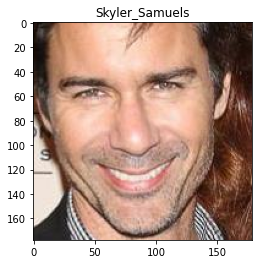

(178, 179, 3)


In [11]:
img_index = np.random.randint(len(X_train))

img_rgb = cv2.cvtColor( X_train[img_index], cv2.COLOR_BGR2RGB )

plt.imshow(img_rgb)
plt.title(classes[y[img_index]])
plt.show()

print(img_rgb.shape)

## Salvando os subsets (train and validation) como numpy no disk

In [12]:
np.save("X_train_path", X_train_path)
np.save("X_valid_path", X_valid_path)
np.save("X_train", X_train)
np.save("X_valid", X_valid)
np.save("y_train", y_train)
np.save("y_valid", y_valid)

/home/luisgrabrielcondados/anaconda3/envs/RN/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
